#                                 __INTRODUCCION__

*  ___Contexto del Proyecto___




*  El presente proyecto se centra en el análisis de un dataset relacionado con el rendimiento y el valor de los jugadores de la mayoria de ligas de futbol del mundo de las  temporadas 2021-2022 y 2022-2023 . El dataset contiene una serie de atributos que describen las características y estadísticas de los jugadores, así como su valor actual en el mercado de transferencias, entre otros.


*  ___Descripción del Dataset___


*  El dataset proporciona información detallada sobre diferentes aspectos de los jugadores, incluyendo su posición en el campo, edad, número de goles y asistencias, tarjetas recibidas, minutos jugados, entre otros. Además, se incluye el valor actual de cada jugador, que refleja su cotización en el mercado y su relevancia económica.

*  ___Objetivo del Análisis___


*  El objetivo principal de este análisis es explorar la relación entre dos variables clave: las apariciones (partidos que disputa un jugador) y su valor actual en el mercado. Entender esta relación nos permitirá obtener insights importantes sobre el impacto de la aparicion, o partido disputado, y  el valor económico de los jugadores, así como identificar posibles estrategias para maximizar su valor en el mercado de transferencias.

*  ___Estructura del Análisis___
*  En este análisis, llevaremos a cabo un enfoque bivariado para explorar la relación entre las aparicione  el valor actual de los jugadores, para buscar la relacion entre partidos disputados y valor del jugador.

*   Trataremos de ver como se relacionan  y si existe alguna influencia entre ambas variables, y al final intentaremos en un heatmap, la influencia de la edad.

*  Primero vamos a realizar un analisis univarido de cada variable.

*  ___Apariciones.___
*  ___Valor actual.___

Realizaremos

*  Eleccion y adecuacion del dataset a nuestra necesidad.

*  Analisis Estadistico:
    *   Media.
    *   Mediana.
    *   Moda.
    *   Medidas de dispersión.

*   Visualizaciones.

*   Se intentara mostrar de forma grafica, lo mencionado previamente.

In [ ]:
# importacion de librerias necesarias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# lectura de nuestro df
df=pd.read_csv("./data.csv")

# selecciono lo que necesito
df_proyecto=df[['Posicion','Nombre','Edad','Apariciones','Minutos Jugados','Valor Actual','Equipo']].copy()

# cambiar a edad entero
df_proyecto['Edad'] = df_proyecto['Edad'].astype(int)

# solo quiero que las posiciones de la cancha sean unicas (arqueros, defensas, medios, y delanteros)
df_proyecto['Posicion'] = df['Posicion'].str.extract(r'^\s*([^\s-]+)')

# agrego una columna  para saber la cantidad de minutos posibles ( cantidad de partidos * 90 ( minutos duracion de partido))
df_proyecto['Minutos Posibles']=df_proyecto['Apariciones']*90

# muestro el valor en millones
df_proyecto['Valor Actual']=df_proyecto['Valor Actual'] / 1000000

# agrego columna para saber que porcentaje disputo de ese total posible
df_proyecto['Cantidad disputada en %']=((df_proyecto['Minutos Jugados'] *100) /df_proyecto['Minutos Posibles']).round(0)


In [ ]:
columnas = {
    'Posicion': 'La posición en la que juega cada jugador en el equipo.',
    'Nombre': 'El nombre completo de cada jugador.',
    'Edad': 'La edad de los jugadores en años.',
    'Apariciones': 'El número de veces que un jugador ha aparecido en partidos.',
    'Minutos Jugados': 'El total de minutos que un jugador ha jugado en partidos.',
    'Valor Actual': 'El valor actual de mercado de los jugadores en millones de dólares.',
    'Equipo': 'El equipo al que pertenece cada jugador.',
    'Minutos Posibles': 'La cantidad total de minutos posibles basada en el número de apariciones de un jugador (90 minutos por partido).',
    'Cantidad disputada en %': 'El porcentaje de minutos disputados en relación con los minutos posibles, expresado como un número entre 0 y 100.'
}

In [ ]:
print(f"Nombre de columna y lo que significa".center(50,"-"))
for columna, valor in columnas.items():
    print(f'{columna}: {valor}')


-------Nombre de columna y lo que significa-------
Posicion: La posición en la que juega cada jugador en el equipo.
Nombre: El nombre completo de cada jugador.
Edad: La edad de los jugadores en años.
Apariciones: El número de veces que un jugador ha aparecido en partidos.
Minutos Jugados: El total de minutos que un jugador ha jugado en partidos.
Valor Actual: El valor actual de mercado de los jugadores en millones de dólares.
Equipo: El equipo al que pertenece cada jugador.
Minutos Posibles: La cantidad total de minutos posibles basada en el número de apariciones de un jugador (90 minutos por partido).
Cantidad disputada en %: El porcentaje de minutos disputados en relación con los minutos posibles, expresado como un número entre 0 y 100.


In [86]:
# funcion para mostrar datos estadisticos
def calcular_estadisticas(df, columna):
    
    # Medidas de Tendencia Central
    media = df[columna].mean()
    mediana = df[columna].median()
    moda = df[columna].mode()[0]

    # Medidas de Dispersión 
    rango = df[columna].max() - df[columna].min()
    desviacion_estandar = df[columna].std()
    cuartiles = df[columna].quantile([0.25, 0.5, 0.75]).to_list()

    print(f"Medidas de Tendencia Central para '{columna}':".center(50,"-"))
    print(f"Media: {media.round(2)}".center(50," "))
    print(f"Mediana: {mediana.round(2)}".center(50," "))
    print(f"Moda: {moda}".center(50," "))
    print("".center(50,"-"))
    print("".center(50,"*"))
    print(f"Medidas de Dispersión para '{columna}':".center(50,"-"))
    print(f"Rango: {rango}".center(50," "))
    print(f"Desviación Estándar: {desviacion_estandar.round(2)}".center(50," "))
    print(f"Cuartiles: {cuartiles}".center(50," "))
    print("".center(50,"-"))

# ___Datos Estadisticos___

In [87]:
calcular_estadisticas(df_proyecto, 'Apariciones')
calcular_estadisticas(df_proyecto, 'Valor Actual')


-Medidas de Tendencia Central para 'Apariciones':-
                   Media: 36.41                   
                  Mediana: 35.0                   
                     Moda: 0                      
--------------------------------------------------
**************************************************
----Medidas de Dispersión para 'Apariciones':-----
                    Rango: 107                    
            Desviación Estándar: 26.53            
          Cuartiles: [12.0, 35.0, 59.0]           
--------------------------------------------------
Medidas de Tendencia Central para 'Valor Actual':-
                   Media: 3.62                    
                   Mediana: 0.8                   
                    Moda: 1.0                     
--------------------------------------------------
**************************************************
----Medidas de Dispersión para 'Valor Actual':----
                   Rango: 180.0                   
             Desviación Estánda

In [ ]:
# Calcular la correlación entre Apariciones y Valor Actual 
correlation = df_proyecto['Apariciones'].corr(df_proyecto['Valor Actual'])
print(f"Correlación entre Edad y Valor Actual: {correlation}")

# Calcular la covarianza ( como cambian las dos variable, pero juntas)
covariance = df_proyecto['Apariciones'].cov(df_proyecto['Valor Actual'])
print(f"Covarianza entre Edad y Valor Actual: {covariance}")

#   Visualizaciones 

In [103]:

def grafico_histograma(df, columna, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.histplot(df[columna], bins=15, kde=True)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel(f'Frecuencia de {columna}')
    plt.show()


def grafico_boxplot(df, columna, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}')
    plt.xlabel(columna)
    plt.show()

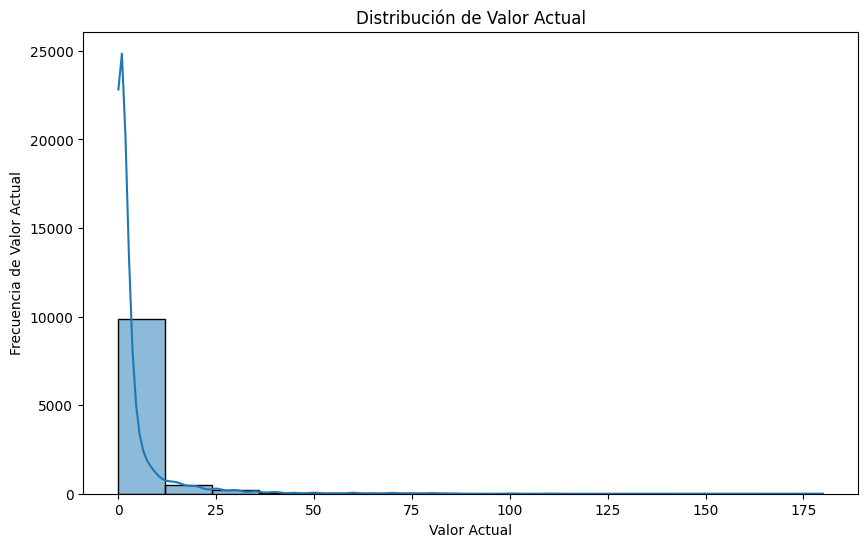

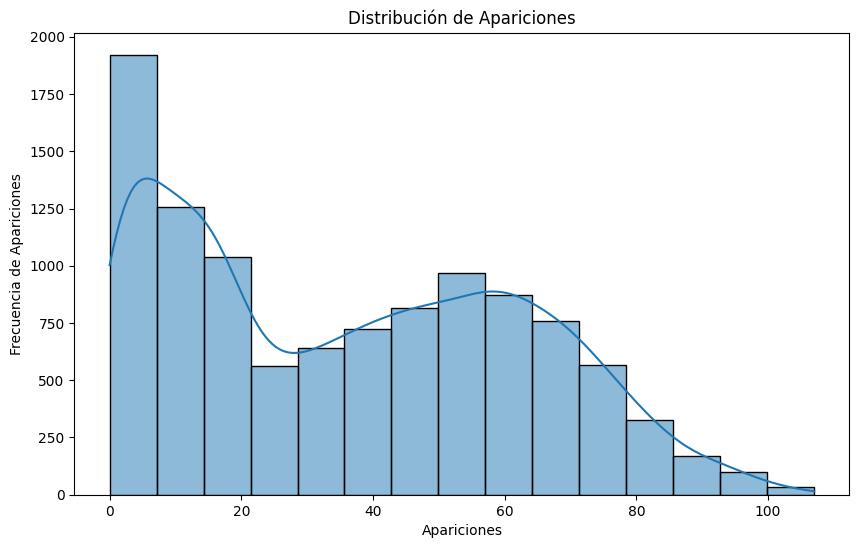

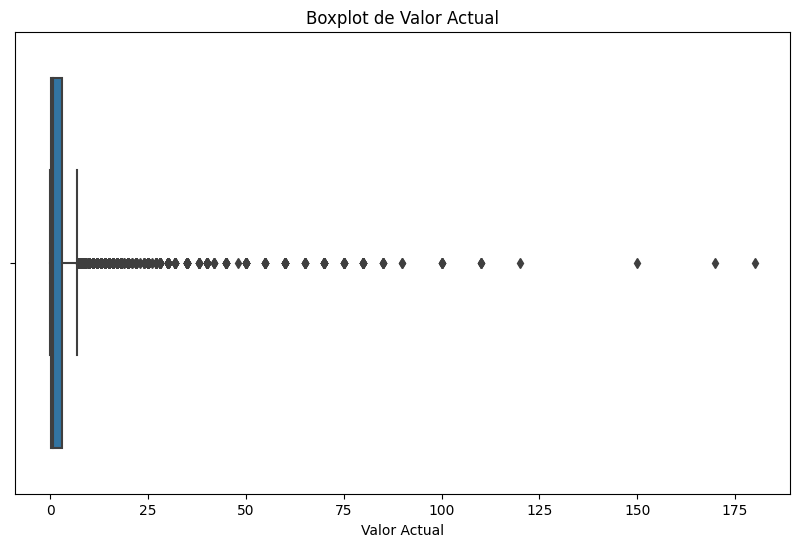

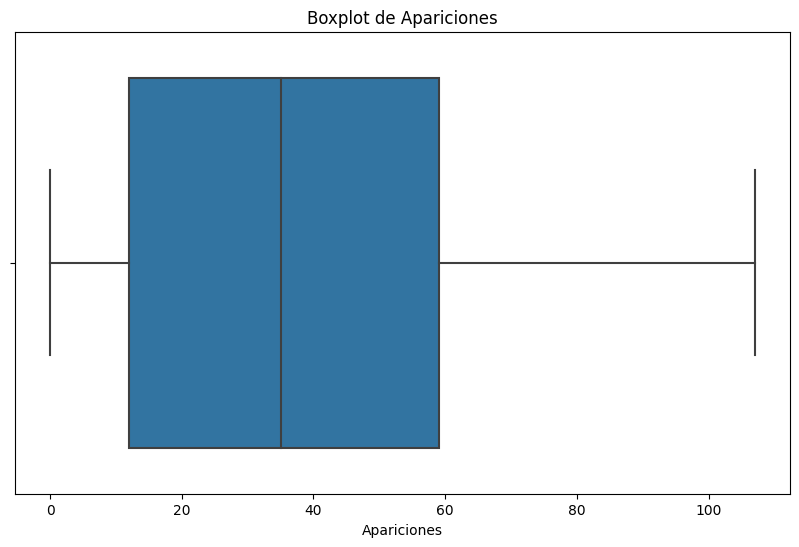

In [105]:
grafico_histograma(df_proyecto, 'Valor Actual')
grafico_histograma(df_proyecto, 'Apariciones')

grafico_boxplot(df_proyecto, 'Valor Actual')
grafico_boxplot(df_proyecto, 'Apariciones')

In [123]:
def valores_unicos_ordenados(df, columna):
    # Obtener los valores únicos de la columna y ordenarlos
    valores_unicos = sorted(df[columna].unique())
    print(valores_unicos)

In [136]:
lista_edad=valores_unicos_ordenados(df_proyecto, 'Edad')
lista_apariciones=valores_unicos_ordenados(df_proyecto, 'Apariciones')
lista_valor_actual=valores_unicos_ordenados(df_proyecto, 'Valor Actual')

[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107]
[0.0, 0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.85, 0.875, 0.9, 0.925, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.75, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 4.0, 4.2, 4.3, 4.4, 4.5, 4.7, 4.8, 5.0, 5.5, 5.8, 6.0, 6.5, 7.0

In [137]:
tamaño=len(lista_edad)print(tamaño)

29


TypeError: object of type 'NoneType' has no len()

In [133]:
def organizar_en_rangos(valores):
    
    # Calcular el tamaño de los rangos
    num_rangos = len(valores) // 10  # Dividir en 10 rangos
    if len(valores) % 10 != 0:
        num_rangos += 1

    # Dividir los valores en rangos
    rangos = []
    for i in range(0, len(valores), num_rangos):
        rango = valores[i:i+num_rangos]
        rangos.append(rango)

    return rangos



In [134]:
rangos = organizar_en_rangos(lista_edades)
for rango in rangos:
    print(rango)

[15, 16, 17]
[18, 19, 20]
[21, 22, 23]
[24, 25, 26]
[27, 28, 29]
[30, 31, 32]
[33, 34, 35]
[36, 37, 38]
[39, 40, 41]
[42, 43]


#                                    Visualizaciones de la Variable Valor Actual.

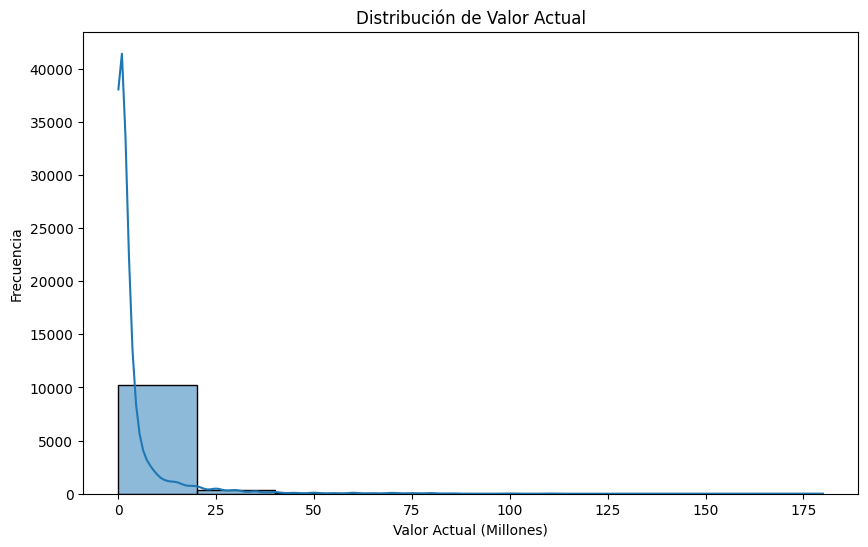

In [42]:
bins_valor = [0, 10, 20, 30, 40, 50, 60, 70] 
labels_valor = ['<10M', '10-20M', '20-30M', '30-40M', '40-50M', '50-60M', '>60M']
df_proyecto['Valor_Categoria'] = pd.cut(df_proyecto['Valor Actual'], bins=bins_valor, labels=labels_valor, right=False)

# Histograma para Valor Actual ( mostrara la frecuencia de los valore de los pases actual de cada jugador)
plt.figure(figsize=(10, 6))
sns.histplot(df_proyecto['Valor Actual'], bins=9, kde=True)
plt.title('Distribución de Valor Actual')
plt.xlabel('Valor Actual (Millones)')
plt.ylabel('Frecuencia')
plt.show()


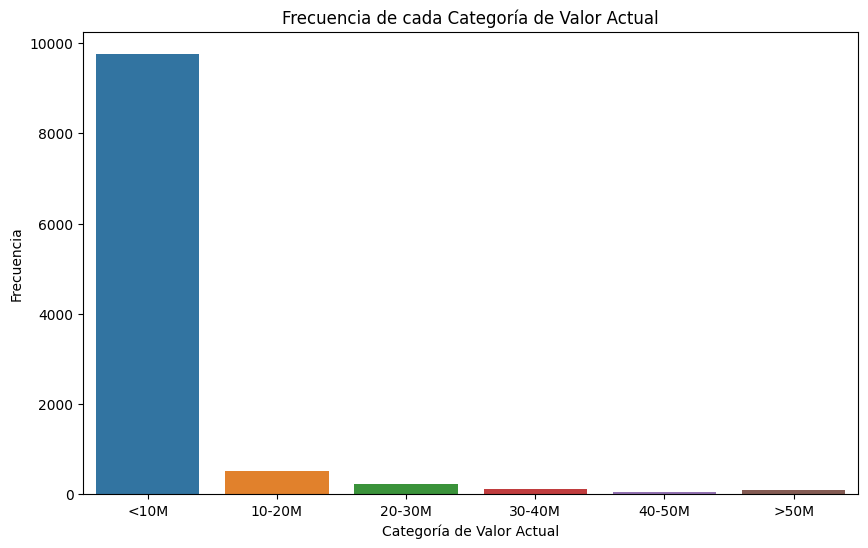

In [15]:

#Gráfico de Barras para Valor Actual por Categorías
plt.figure(figsize=(10, 6))
sns.countplot(x=df_proyecto['Valor_Categoria'], order=labels_valor)
plt.title('Frecuencia de cada Categoría de Valor Actual')
plt.xlabel('Categoría de Valor Actual')
plt.ylabel('Frecuencia')
plt.show()

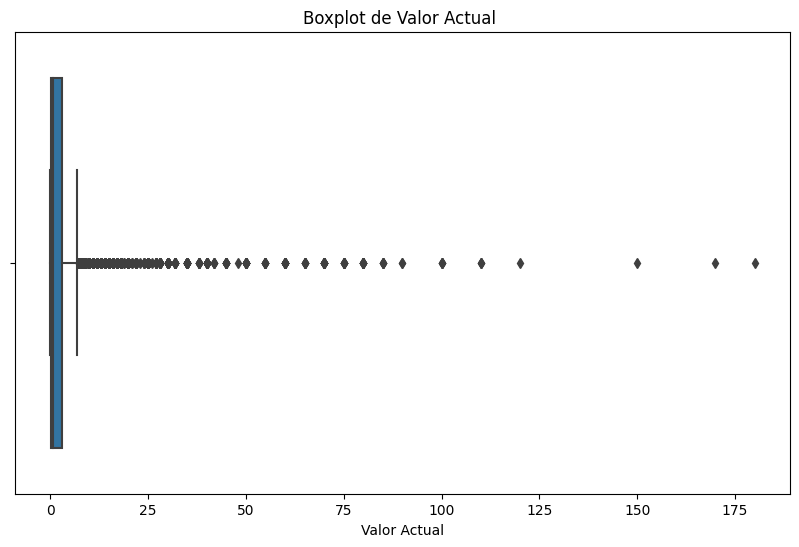

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_proyecto['Valor Actual'])
plt.title('Boxplot de Valor Actual ')
plt.xlabel('Valor Actual')
plt.show()

#   Análisis Bivariado para "Edad" y "Valor Actual"

In [69]:
lista_edades = sorted(df_proyecto['Edad'].unique().tolist())
print(lista_edades)

[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]


In [61]:
# Calcular la correlación
correlation = df_proyecto['Apariciones'].corr(df_proyecto['Valor Actual'])
print(f"Correlación entre Edad y Valor Actual: {correlation}")

# Calcular la covarianza ( como cambian las dos variable, pero juntas)
covariance = df_proyecto['Apariciones'].cov(df_proyecto['Valor Actual'])
print(f"Covarianza entre Edad y Valor Actual: {covariance}")

Correlación entre Edad y Valor Actual: 0.4196560172857307
Covarianza entre Edad y Valor Actual: 101.25030605296568


#   Visualizaciones:

*   Scatter Plot (Diagrama de Dispersión): Para observar la relación entre "Edad" y "Valor Actual".
*   Boxplot de "Valor Actual" por categorías de "Edad": Para ver la distribución del valor actual en diferentes grupos de edad.
*   Heatmap: Para visualizar la correlación entre las variables si tienes más variables y quieres ver la matriz de correlación completa.

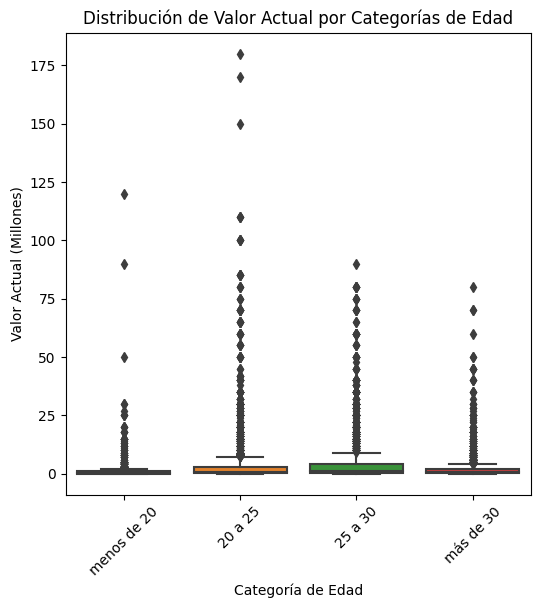

In [53]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Edad_Categoria', y='Valor Actual', data=df_proyecto, order=labels)
plt.title('Distribución de Valor Actual por Categorías de Edad')
plt.xlabel('Categoría de Edad')
plt.ylabel('Valor Actual (Millones)')
plt.xticks(rotation=45)
plt.show()

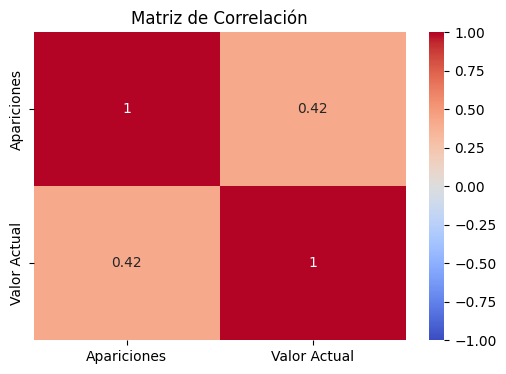

In [75]:
plt.figure(figsize=(6, 4))
correlation_matrix = df_proyecto[['Apariciones','Valor Actual']].corr()              
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [72]:
def heatmap_por_edad(df, edades, columnas):
    for edad in edades:
        # Filtrar el DataFrame para incluir solo la edad especificada
        df_filtrado = df[df['Edad'] == edad]
       
        # Crear el mapa de calor
        plt.figure(figsize=(10, 4))
        ax = sns.heatmap(df_filtrado[columnas].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

        plt.title(f'Matriz de Correlación para la edad {edad}')
        plt.show()

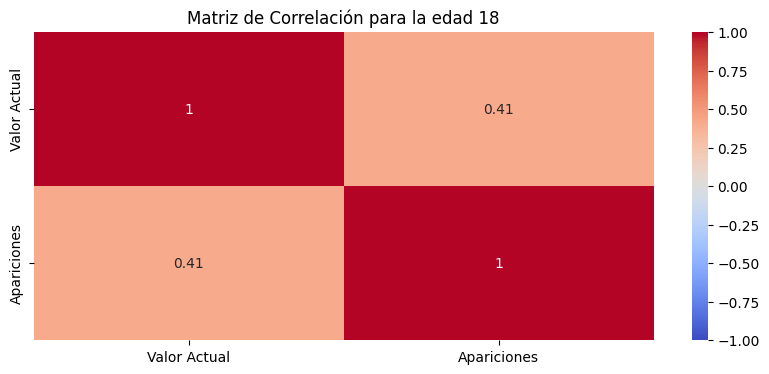

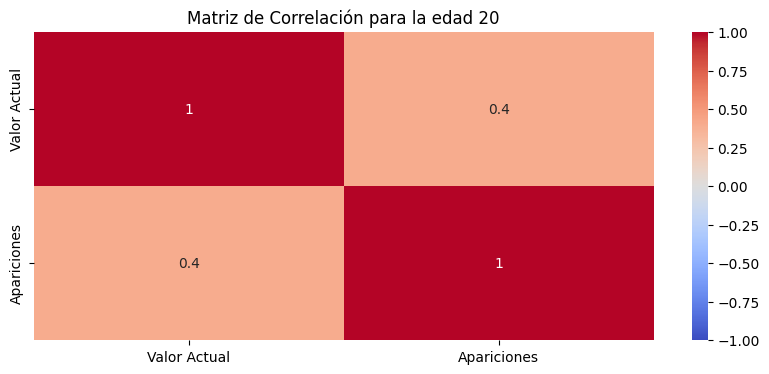

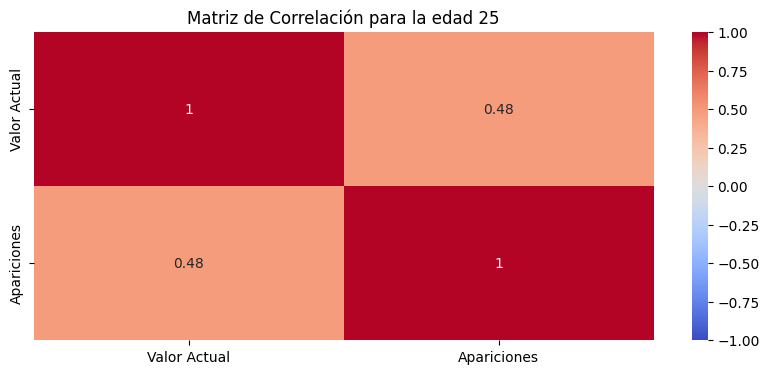

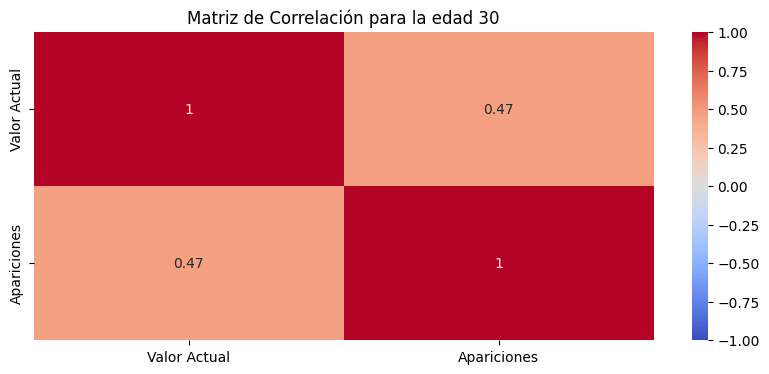

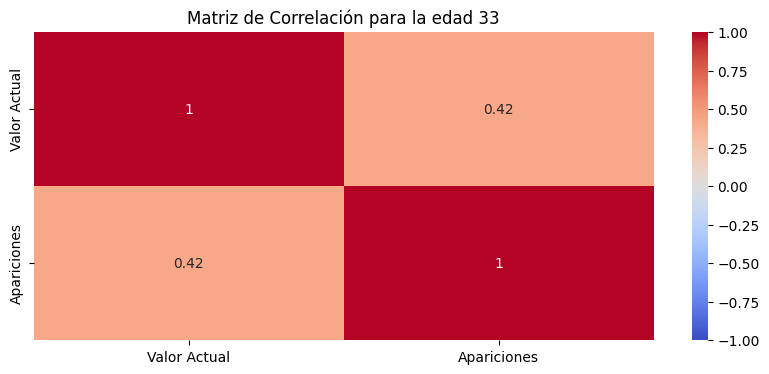

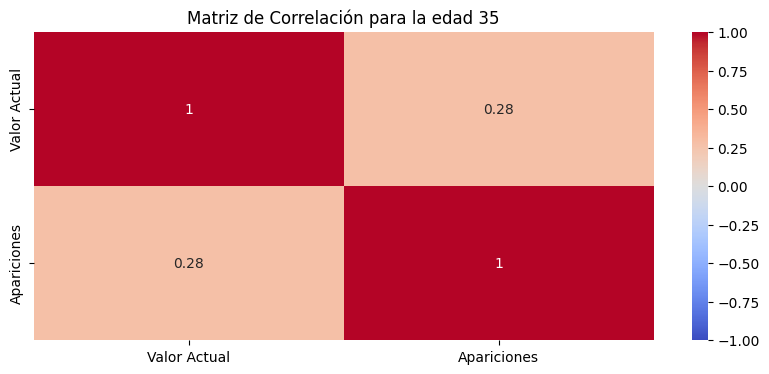

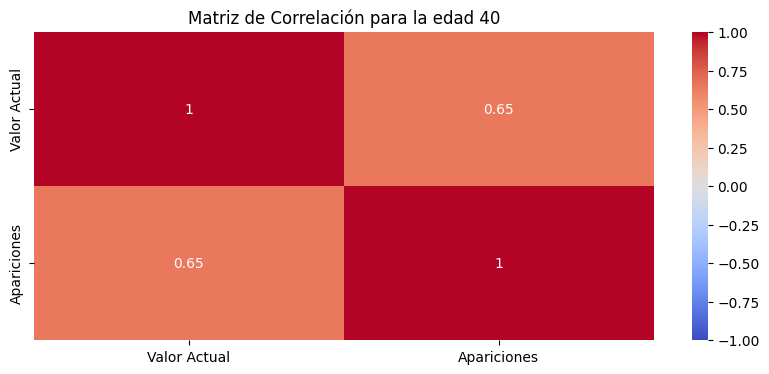

In [73]:
heatmap_por_edad(df_proyecto, [18, 20, 25, 30,33,35,40], ['Valor Actual','Apariciones'])

#  Edad y Apariciones: 
*  La correlación es de 0.14, lo que indica una correlación positiva débil. Esto significa que a medida que la edad de los jugadores aumenta, también lo hace el número de apariciones, pero el efecto es bastante débil.


#  Edad y Minutos Jugados: 
*  La correlación es de 0.17, lo que indica una correlación positiva débil. Esto significa que a medida que la edad de los jugadores aumenta, también lo hacen los minutos jugados, pero el efecto es bastante débil.


#   Valor Actual y Apariciones: 
*  La correlación es de 0.42, lo que indica una correlación positiva moderada. Esto significa que a medida que el valor actual de los jugadores aumenta, también lo hace el número de apariciones.


#   Valor Actual y Minutos Jugados: 
*  La correlación es de 1, lo que indica una correlación positiva perfecta. Esto significa que a medida que el valor actual de los jugadores aumenta, también lo hacen los minutos jugados.